# Predicting Diabetes

The purpose of this project is to predict diabetes likelihood given a number of variables like Age and number of pregnancies.

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

In [7]:
path = "diabetes.csv"
diabetes_df = pd.read_csv(path)

As we can see below, there is no missing data in this dataframe, so we will jump to EDA right away.

In [8]:
display(diabetes_df.head())
display(diabetes_df.info())
display(diabetes_df.describe())

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               10000 non-null  int64  
 1   Pregnancies             10000 non-null  int64  
 2   PlasmaGlucose           10000 non-null  int64  
 3   DiastolicBloodPressure  10000 non-null  int64  
 4   TricepsThickness        10000 non-null  int64  
 5   SerumInsulin            10000 non-null  int64  
 6   BMI                     10000 non-null  float64
 7   DiabetesPedigree        10000 non-null  float64
 8   Age                     10000 non-null  int64  
 9   Diabetic                10000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 781.4 KB


None

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,1.000000e+04,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.502122e+06,3.25580,107.850200,71.207500,28.81760,139.243600,31.567022,0.400944,30.134100,0.334400
std,2.892868e+05,3.40572,31.920909,16.801478,14.50648,133.777919,9.804366,0.381463,12.106047,0.471804
min,1.000038e+06,0.00000,44.000000,24.000000,7.00000,14.000000,18.200807,0.078044,21.000000,0.000000
25%,1.251672e+06,0.00000,84.000000,58.000000,15.00000,39.000000,21.247427,0.137065,22.000000,0.000000
50%,1.504394e+06,2.00000,105.000000,72.000000,31.00000,85.000000,31.922421,0.199698,24.000000,0.000000
75%,1.754608e+06,6.00000,129.000000,85.000000,41.00000,197.000000,39.328921,0.621158,35.000000,1.000000
max,1.999997e+06,14.00000,192.000000,117.000000,92.00000,796.000000,56.034628,2.301594,77.000000,1.000000


In [9]:
diabetes_df.drop(['PatientID'], axis=1, inplace=True)

Below, you can see that the classes are slightly unbalanced:

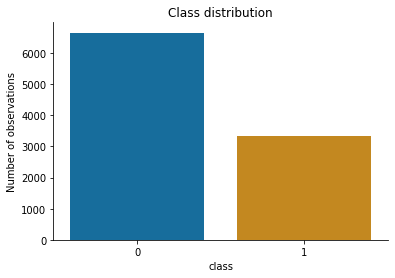

0    0.6656
1    0.3344
Name: Diabetic, dtype: float64


In [10]:
sns.countplot(x='Diabetic', data=diabetes_df, palette='colorblind')\
                            .set(title='Class distribution', ylabel='Number of observations', xlabel='class')
sns.despine()
plt.show()
print(diabetes_df['Diabetic'].value_counts()/diabetes_df['Diabetic'].count())

This is not a huge problem, since the classes are in the same order of magnitude, if that was not the case, some additional technique could have to be used (simulate data or change the weights in one of the two classes).

Now let's have some fun with the other variables

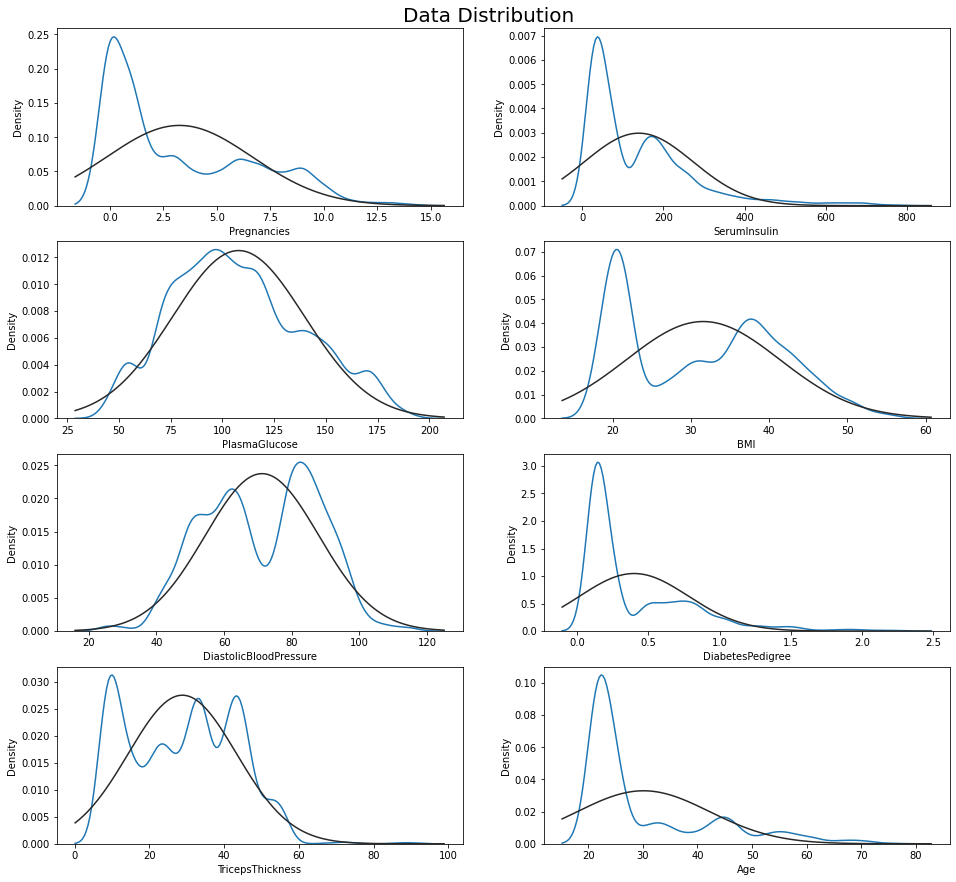

In [11]:
# Boxplot to check for outliers
variables = diabetes_df.columns.drop('Diabetic')

fig, ax = plt.subplots(4, 2 , figsize=(16, 15))

# Full view, no insights, but I will leave here just in case
# sns.pairplot(diabetes_df, hue="Diabetic")
# sns.kdeplot(data=diabetes_df, x="TricepsThickness", hue="Diabetic", common_norm=False)

fig.suptitle('Data Distribution', fontsize=20, y=0.9)

for i, variable in enumerate(variables):
#     ax[i%4][i//4].boxplot(diabetes_df[variable])
    sns.distplot(diabetes_df[variable], hist=False, fit=norm, ax=ax[i%4][i//4]) # TODO Change to kdeplot
    ax[i%4][i//4].set_xlabel(variable)        
    
plt.show()

Clearly the data doesn't follow the normal distribution, except Plasma Glucose

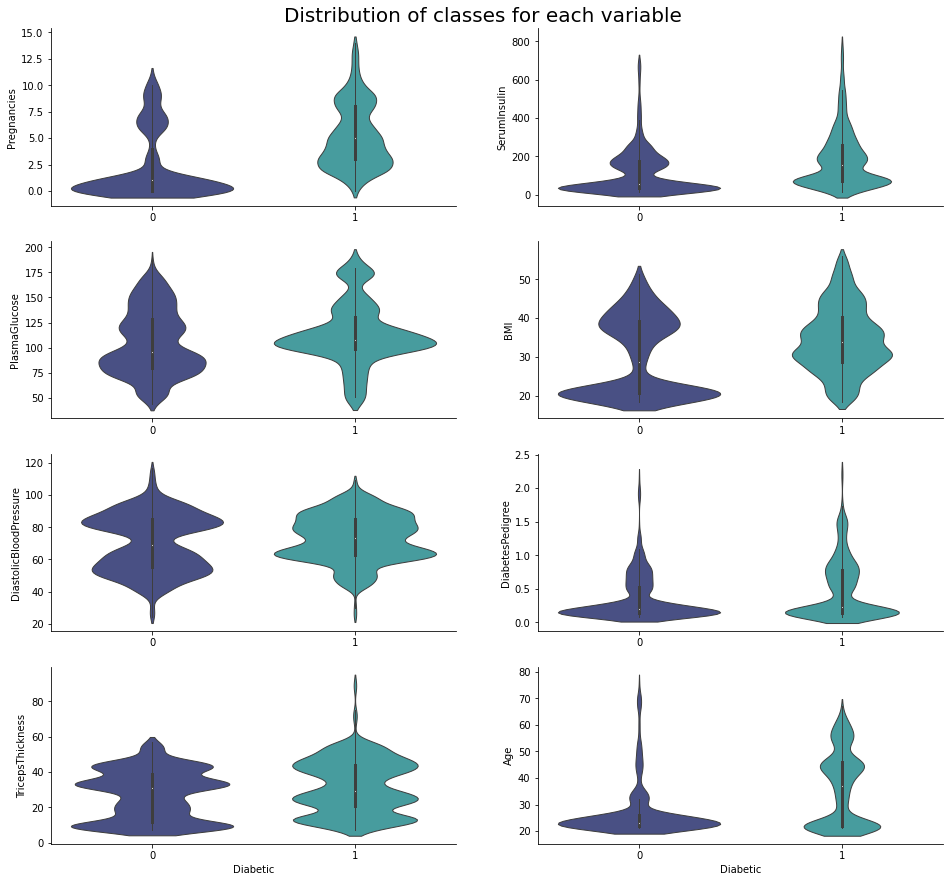

In [12]:
# Checking relationship between variables and diabetes:

fig, ax = plt.subplots(4, 2 , figsize=(16, 15))

# Full view, no insights, but I will leave here just in case
# sns.pairplot(diabetes_df, hue="Diabetic")
# sns.kdeplot(data=diabetes_df, x="TricepsThickness", hue="Diabetic", common_norm=False)

fig.suptitle('Distribution of classes for each variable', fontsize=20, y=0.9)

for i, variable in enumerate(variables):
    sns.violinplot(x="Diabetic", y=variable, data=diabetes_df, palette="mako", bw=.2, cut=1, linewidth=1, ax=ax[i%4][i//4])
    sns.despine()
    if i not in [3,7]:
        ax[i%4][i//4].set_xlabel("")
        
    
plt.show()

Insights we can take from the graphics above:
- The number of pregnancies someone had seems to affect the likelihood of having diabetes
- High BMI apparently affects diabetes probability, but for people with no-diabetes(0) we have what appears to be two very distinct sets of people
- Age also appears to make a significant difference

It appears it will be interesting to compare the median value of each variable for diabetics and non-diabetics
I will also look for correlations between variables to see if something can help understanding the 

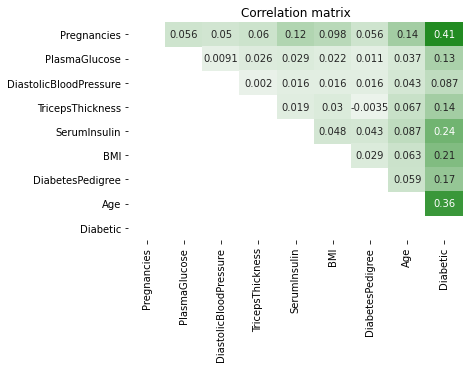

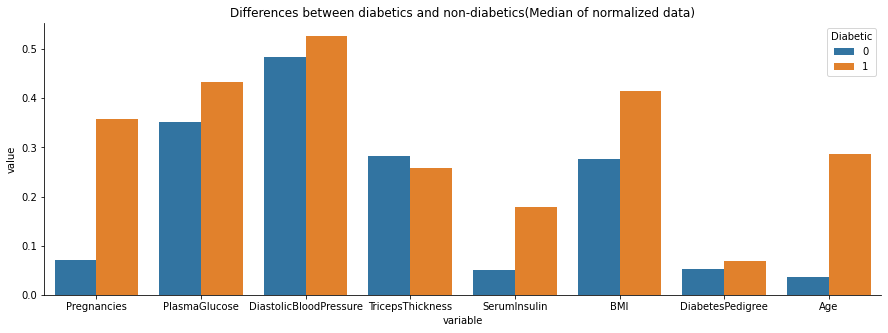

In [13]:
correlation_mask = np.tril(diabetes_df.corr())
palette = sns.light_palette("forestgreen", as_cmap=True)
sns.heatmap(diabetes_df.corr(), annot=True, fmt='.2g',mask=correlation_mask,  cbar=False, cmap= palette)\
                    .set_title("Correlation matrix")
plt.show()

# Normalize data to check difference between diabetics and non-diabetics
scaler = MinMaxScaler()
scaler.fit_transform(diabetes_df[variables])
transformed_diabetes = diabetes_df.copy()
transformed_diabetes[variables] = scaler.transform(transformed_diabetes[variables])

fig, ax = plt.subplots(figsize=(15, 5))
grouped_data = transformed_diabetes.groupby('Diabetic')[variables].median()
grouped_data = pd.melt(grouped_data, ignore_index=False)
grouped_data['Diabetic'] = grouped_data.index
ax = sns.barplot(x="variable", y="value", hue="Diabetic", data=grouped_data)\
                    .set_title("Differences between diabetics and non-diabetics(Median of normalized data)")
sns.despine()
# print(grouped_data)
plt.show()

No correlation was found between independent variables and it is also possible to see significant differences between diabetics and non-diabetics in some variables. The next step is to start predicting!

In [18]:
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss, f1_score, make_scorer
from sklearn.decomposition import PCA
from sklearn.metrics import plot_confusion_matrix

First we define what will be our evaluation metrics. I intent use the log loss to optimize the models and check the ROC-AUC and the F1 Score since we are dealing with unbalanced data.

In [15]:
def roc_auc(true_y, predicted_y, model_name):
    """ evaluates unbalanced classification"""

    from sklearn.metrics import roc_curve, auc, roc_auc_score

    fpr, tpr, thresholds = roc_curve(true_y, predicted_y)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic for {model_name}')
    plt.legend(loc="lower right")
    plt.show() 
    
    return None


def run_model(model_name , pipeline, parameters, X_train, X_test, y_train, y_test, scorer):
    """Run model and return pipeline with the best parameters attached to it"""
    
    from sklearn.metrics import f1_score
    
    cv = GridSearchCV(pipeline, param_grid=parameters, cv=5, scoring=scorer)
    cv.fit(X_train, y_train)
    
    print(f"Results for {model_name}")
    print(f"Best parameters: {cv.best_params_}")
    
    y_pred_proba = cv.predict_proba(X_test)
    roc_auc(y_test, y_pred_proba[:, 1], model_name)
    y_pred = cv.predict(X_test)
    F1_score = f1_score(y_test, y_pred)
    
    print(f"{model_name} log loss score: {cv.best_score_}")
    print(f"{model_name} F1 score: {F1_score}")
    
    return pipeline.set_params(**cv.best_params_)

In [16]:
X = diabetes_df[variables]
y = diabetes_df['Diabetic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
log_score = make_scorer(log_loss, greater_is_better = False, needs_proba=True)

# For this problem a simple pipeline with a normalizer and a model will do
# Setting up logistic regression
pipe_lr = Pipeline([
                ('standardize', StandardScaler()),
                ('model_log', LogisticRegression(n_jobs=-1, solver='saga')) # saga for elasticnet penalty
])

parameters_lr = {'model_log__C' : [1, 10, 100, 1000] , 
                  'model_log__penalty' : ['elasticnet'], 
                  'model_log__l1_ratio' : np.arange(0.0, 1.1, 0.1)}


# Setting up gradient boosting
pipe_gb = Pipeline([
                ('standardize', StandardScaler()),
                ('model_gradient', GradientBoostingClassifier())
])

parameters_gb = {   'model_gradient__loss' : ['deviance'] , 
                          'model_gradient__learning_rate' : np.arange(0.01, 0.2, 0.09), 
                          'model_gradient__n_estimators' : np.arange(100, 300, 100),
                          'model_gradient__subsample' : [1],
                          'model_gradient__max_depth' : [3, 4, 5],
                          'model_gradient__min_samples_leaf' : [1, 2, 4]}


# Setting up random forest
pipe_rf = Pipeline([
                ('standardize', StandardScaler()),
                ('model_rf', RandomForestClassifier(n_jobs=-1))
])

parameters_rf = { 'model_rf__n_estimators' : np.arange(100, 300, 50) , 
                  'model_rf__min_samples_leaf' : np.arange(0.05, 0.20, 0.05), 
                  'model_rf__max_features' : np.arange(0.1, 0.7, 0.2)}


# Setting up XGBoost
pipe_xg = Pipeline([
                ('standardize', StandardScaler()),   
                ('Model', xgb.XGBClassifier(use_label_encoder=False, verbosity=0))
])

parameters_xg = {'Model__n_estimators' : [50, 100, 200],
             'Model__max_depth' : [1, 2, 3, 4],
             'Model__learning_rate' : [0.0125, 0.025, 0.05],
             'Model__gamma' : [0.1, 0.2],
             'Model__colsample_bylevel' : [0.1, 0.3],
             'Model__reg_alpha' : [0, 1],
             'Model__reg_lambda' : [0, 1]}

# Setting up Naive Bayes
pipe_nb = Pipeline([
                ('Scaler', StandardScaler()),
                ('Dim_Red', PCA()),
                ('Naive_Bayes', GaussianNB())
])

parameters_nb = {'Dim_Red__n_components' : [None, 6, 8, 10, 12, 14, 16]}

Results for Logistic Regression
Best parameters: {'model_log__C': 1, 'model_log__l1_ratio': 0.0, 'model_log__penalty': 'elasticnet'}


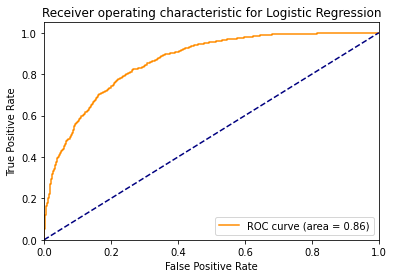

Logistic Regression log loss score: -0.44352923113044557
Logistic Regression F1 score: 0.6553424657534246


In [135]:
pipeline_lr_best = run_model('Logistic Regression' , pipe_lr, parameters_lr , X_train, X_test, y_train, y_test, log_score)

Results for Gradient Boost
Best parameters: {'model_gradient__learning_rate': 0.19, 'model_gradient__loss': 'deviance', 'model_gradient__max_depth': 3, 'model_gradient__min_samples_leaf': 2, 'model_gradient__n_estimators': 200, 'model_gradient__subsample': 1}


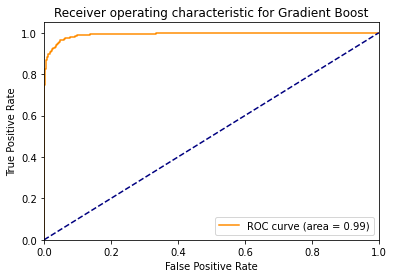

Gradient Boost log loss score: -0.11135363100302334
Gradient Boost F1 score: 0.9323985978968452


In [17]:
pipeline_gb_best = run_model('Gradient Boost' , pipe_gb, parameters_gb , X_train, X_test, y_train, y_test, log_score)

Results for Random Forest
Best parameters: {'model_rf__max_features': 0.5000000000000001, 'model_rf__min_samples_leaf': 0.05, 'model_rf__n_estimators': 100}


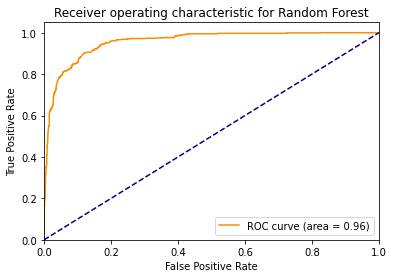

Random Forest log loss score: -0.28566826482489127
Random Forest F1 score: 0.8369351669941061


In [157]:
pipeline_rf_best = run_model('Random Forest' , pipe_rf, parameters_rf , X_train, X_test, y_train, y_test, log_score)

Results for XGBoost
Best parameters: {'Model__colsample_bylevel': 0.3, 'Model__gamma': 0.2, 'Model__learning_rate': 0.05, 'Model__max_depth': 4, 'Model__n_estimators': 200, 'Model__reg_alpha': 0, 'Model__reg_lambda': 0}


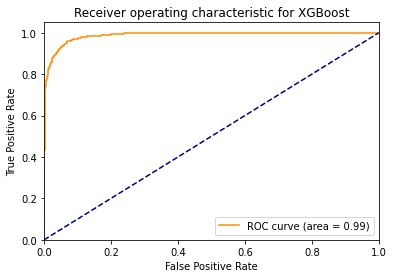

XGBoost log loss score: -0.13850921360644028
XGBoost F1 score: 0.9116751269035533


In [153]:
pipeline_xg_best = run_model('XGBoost' , pipe_xg, parameters_xg , X_train, X_test, y_train, y_test, log_score)

Results for Naive Bayes
Best parameters: {'Dim_Red__n_components': 6}


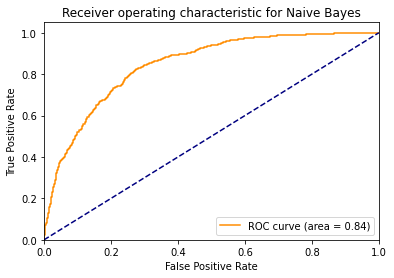

Naive Bayes log loss score: -0.45537409677037416
Naive Bayes F1 score: 0.6362649294245386


In [156]:
pipeline_nb_best = run_model('Naive Bayes' , pipe_nb, parameters_nb , X_train, X_test, y_train, y_test, log_score)

Apparently tree-based models did a wonderful job predicting people with diabetes. I will end by plotting the best predictors of the gradient boosting model and a confusion matrix with the test data to see more insights.

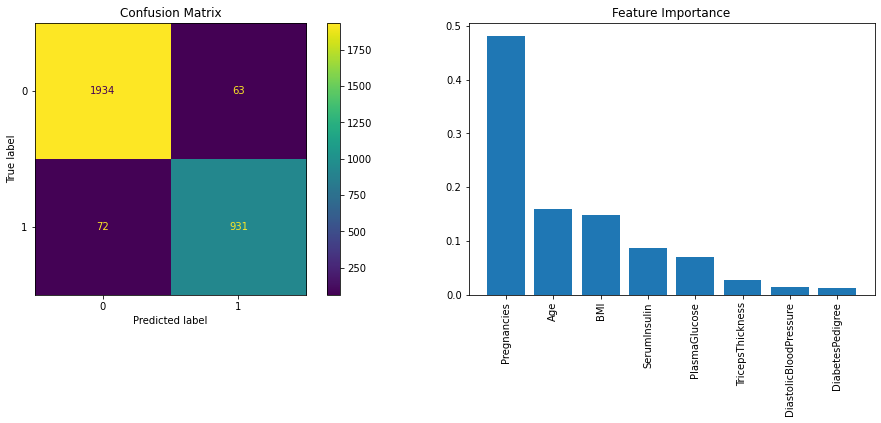

In [23]:
#confusion matrix
fig, ax = plt.subplots(1, 2 , figsize=(16, 5))

pipeline_gb_best.fit(X_train, y_train)
plot_confusion_matrix(pipeline_gb_best, X_test, y_test, ax=ax[0]) 
ax[0].set_title('Confusion Matrix')

# Gradient Boost relevant variables
aux_dict = {}

for i, value in enumerate(variables):
    aux_dict[value] = pipeline_gb_best.named_steps['model_gradient'].feature_importances_[i]
    

aux_df = pd.Series(aux_dict)

aux_df = aux_df.apply(lambda x: abs(x))
aux_df = aux_df.sort_values(ascending=False)

ax[1].set_title('Feature Importance')
ax[1].bar(aux_df.index, aux_df)
ax[1].tick_params(axis='x', rotation=90)
plt.show()


Interestingly, Age and BMI helped more predicting diabetes than Glucose for instance. Also, number of pregnancies appears to be a very important factor.